# TRABAJO SUSTITUTORIO DE PARCIAL 3

## Estudiante: **FELIPE RODRIGUEZ ANGEL**


---


</br>
</br>


## **PROBLEMA 1**

**Modelo a implementar:**   *Kmeans*

**Archivo fuente:** *usuarios_twitter.csv*

**Objetivo:** agrupar usuarios por sus rasgos de personalidad
**Variable de entrada:** crea tu modelo seleccionando solo 3 características
usuario: nombre en Twitter
- *“op”:* &emsp; &emsp;&emsp;Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- *“co”:* &emsp; &emsp;&emsp;Conscientiousness – grado de orden, prolijidad, organización
- *“ex”:* &emsp; &emsp;&emsp;Extraversion – grado de timidez, solitario o participación ante el grupo social
- *“ag”:* &emsp; &emsp;&emsp;Agreeableness – grado de empatía con los demás, temperamento
- *“ne”:* &emsp; &emsp;&emsp;Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- *Wordcount:* &emsp; &emsp;Cantidad promedio de palabras usadas en sus tweets

**Variable de salida:**

 - Categoría  
 - Actividad laboral del usuario (1. Actor/actriz, 2. Cantante, 3. Modelo, 4. Tv, series, 5. Radio, 6. Tecnología, 7. Deportes, 8. Politica y 9. Escritor)

**Debes responder a:**


- ¿Cuál es el número adecuado de cluster? 
- ¿Qué interpretación le dan a los grupos que se han formado?

<BR>
<BR>


---

## **TL;DR [Resumen]**

### - ¿Cuál es el número adecuado de cluster?

#### **Respuesta:** `cluster=3`, según el análisis de silueta y el método del codo


<br>
<br>

### - ¿Qué interpretación le dan a los grupos que se han formado?

#### **Respuesta:** 

Podemos afirmar lo siguiente de los 3 grupos formados:

- **Grupo 0:** [ -0.711, 0.975, -0.490] `->` Caracterizado por una menor Apertura, la Extraversión más alta y menor Neuroticismo. Este grupo también tiene el promedio más bajo de palabras por tweet.

- **Grupo 1:** [1.076, -0.633, -0.531] `->` Caracterizado por la Apertura más alta, menor Extraversión y menor Neuroticismo. Este grupo tiene un promedio más alto de palabras por tweet.

- **Grupo 2:** [-0.321, -0.334, 0.948] `->` Caracterizado por una Apertura moderada, Extraversión moderada y el Neuroticismo más alto. Este grupo tiene el promedio más alto de palabras por tweet.


Por otro lado, mirando los trabajos de los usuarios. La distribución de las categorías ocupacionales dentro de cada grupo es la siguiente:

- **Grupo 0**: Este grupo tiene una distribución bastante equilibrada entre diferentes categorías ocupacionales, con un ligero énfasis en las categorías 4 (Televisión, series), 2 (Cantante) y 7 (Deportes).

- **Grupo 1:** Este grupo está dominado por las categorías 2 (Cantante) y 1 (Actor/Actriz), lo que sugiere que estas profesiones pueden compartir rasgos de personalidad similares basados en las características seleccionadas.

- **Grupo 2**: Este grupo tiene una distribución más uniforme entre las categorías 1 (Actor/Actriz), 7 (Deportes), 8 (Política) y 9 (Escritor), lo que indica un conjunto diverso de ocupaciones que pueden correlacionarse con los rasgos de personalidad en este grupo.

In [25]:
## imports

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



In [3]:
# Load the data
file_path = './usuarios_twitter.csv'
twitter_users = pd.read_csv(file_path)

# Display the first few rows of the dataframe
twitter_users.head()


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


---

<BR>

<BR>

### **Initial DATA EXPLORATION**

 I used the `describe()` method to provide a **statistical summary of the dataset**. This summary showed that the average scores for the personality traits like Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism vary, with some traits having wider spreads than others.

 Also, there are 140 entries and no null values in any of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


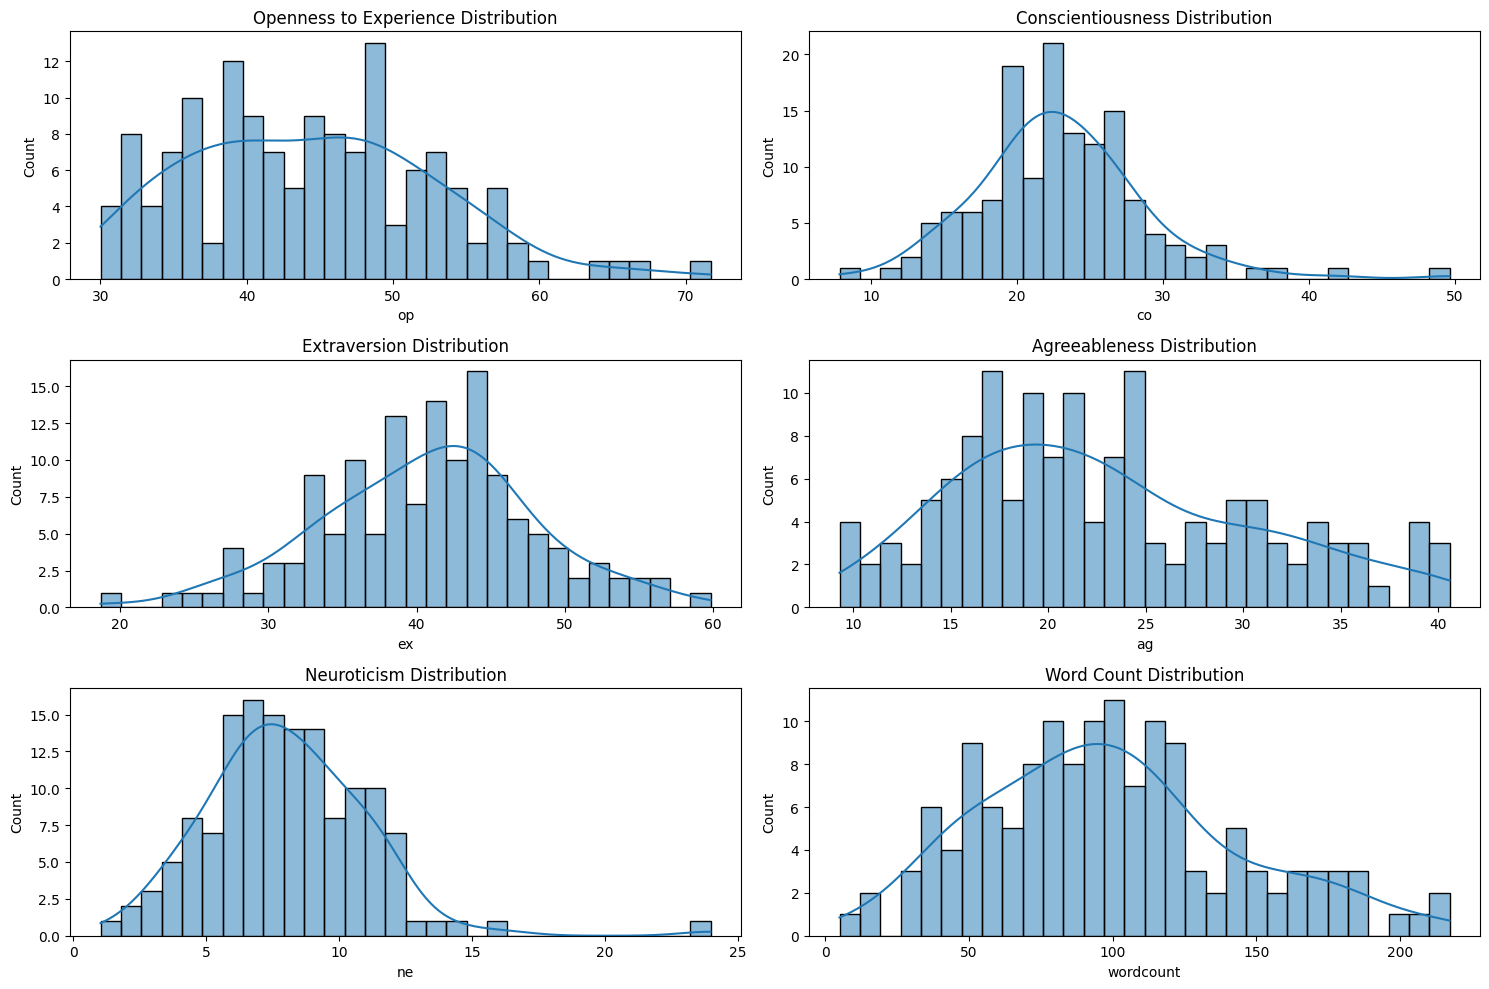

In [6]:
# Display basic information about the dataset
basic_info = twitter_users.info()

# Display statistical summary of the dataset
statistical_summary = twitter_users.describe()

# Visualization: Histograms for the personality traits

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Subplot for Openness
plt.subplot(3, 2, 1)
sns.histplot(twitter_users['op'], bins=30, kde=True)
plt.title('Openness to Experience Distribution')

# Subplot for Conscientiousness
plt.subplot(3, 2, 2)
sns.histplot(twitter_users['co'], bins=30, kde=True)
plt.title('Conscientiousness Distribution')

# Subplot for Extraversion
plt.subplot(3, 2, 3)
sns.histplot(twitter_users['ex'], bins=30, kde=True)
plt.title('Extraversion Distribution')

# Subplot for Agreeableness
plt.subplot(3, 2, 4)
sns.histplot(twitter_users['ag'], bins=30, kde=True)
plt.title('Agreeableness Distribution')

# Subplot for Neuroticism
plt.subplot(3, 2, 5)
sns.histplot(twitter_users['ne'], bins=30, kde=True)
plt.title('Neuroticism Distribution')

# Subplot for Word Count
plt.subplot(3, 2, 6)
sns.histplot(twitter_users['wordcount'], bins=30, kde=True)
plt.title('Word Count Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

---

<BR>
<BR>

### **FEATURE SELECTION**

A **data-driven approach** to selecting the three characteristics for clustering was done analyzing the dataset to determine which features offer the most variance or have the most distinct groups.

To do this, we used these approaches:

1. **Correlation Analysis:** By examining the correlation matrix, we can select features that are less correlated with each other, as highly correlated features may carry redundant information.


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Future

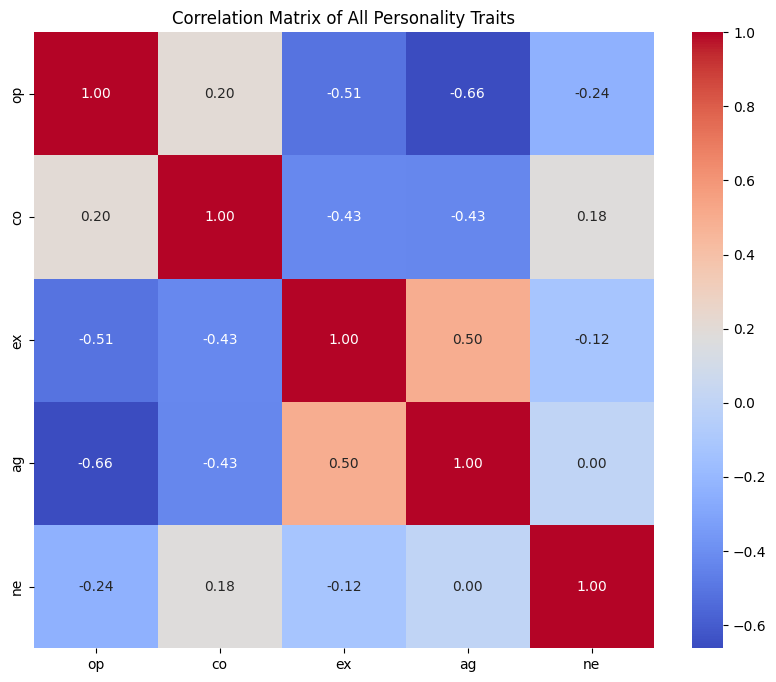

In [12]:
all_features = twitter_users[['op', 'co', 'ex', 'ag', 'ne']]
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# Performing PCA with all five components
pca = PCA(n_components=5)
pca.fit(all_features_scaled)
pca_explained_variance = pca.explained_variance_ratio_

# Running the correlation matrix with all features
correlation_matrix = all_features.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of All Personality Traits")
plt.show()

#### **Correlation Analysis**

The correlation matrix indicates how each personality trait is related to the others. Here's what we can observe from the matrix:

- op (Openness) has a significant negative correlation with ag (Agreeableness).
- ex (Extraversion) is negatively correlated with both op and co (Conscientiousness), but positively with ag.
- ne (Neuroticism) has low correlation with other traits, which may mean it provides unique information.

From the correlation matrix, op, ex, and ne are the least correlated with each other, and thus could be selected for maximizing the diversity of information.

---

<br>
<br>

###  DATA PREPROCESSING

These features were then standardized using StandardScaler, **THIS is important because K-means clustering is sensitive to the scales of the data**. Standardization transforms the data to have a mean of zero and a standard deviation of one.

A pairplot of the selected features was created to visualize their distributions and pairwise relationships. The pairplot helps to visually assess if there are any clear patterns or groupings that K-means might leverage.

The standardized values of the first few rows are displayed to verify the standardization process. The values are now on the same scale, which is recommended for the distance calculations within the K-means algorithm.





---

<BR>
<BR>

### **INITIAL PAIRPLOT VISUALIZATION**



From the pairplot generated for **op (Openness), ex (Extraversion), and ne (Neuroticism)**, we would expect to observe the following:

- **Distributions on the Diagonal:** How each personality trait varies among Twitter users, indicating the diversity within each trait. For instance, if a trait's histogram is wide and flat, it suggests that users' scores on that trait vary widely.

- **Scatter Plots:** If there are distinct clusters, we might see them as concentrations of points or gaps between groups of points. However, if the points are evenly spread without clear clusters, it may suggest that the traits don't have distinct groupings in the dataset.

_**The pairplot didn't show distinct and well-separated clusters**_, which suggests that the K-means algorithm may not find clear-cut, separate clusters based on these features alone. The clusters that K-means will find may be more subtle and not immediately visible from the pairplot. 

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Future

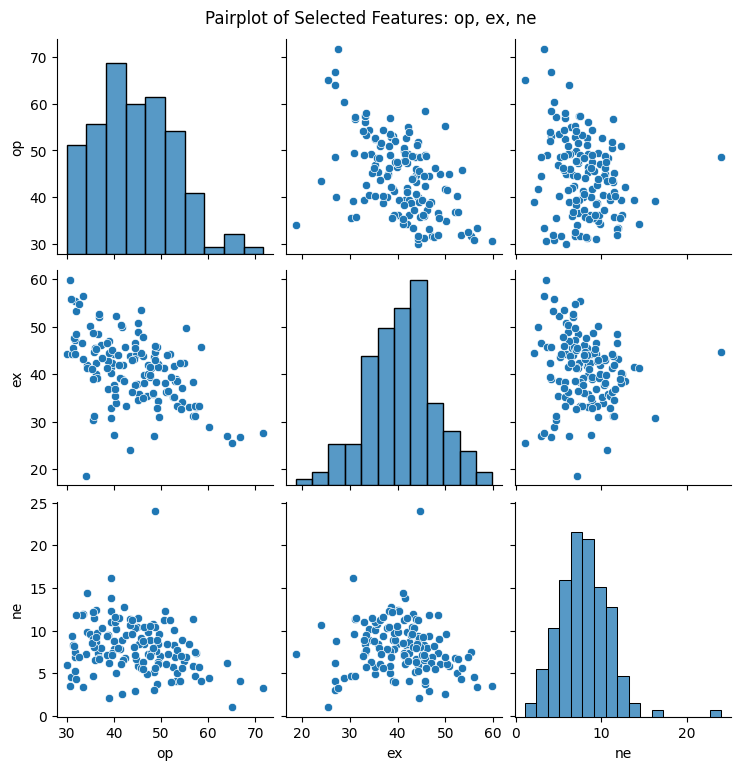

,op,ex,ne
0,-1.204996,0.165428,0.608075
1,0.068161,-0.394646,0.780058
2,-0.319303,-0.246459,0.276347
3,-0.480900,1.616460,-0.980020
4,-0.923095,1.084760,-0.229209


In [14]:
selected_features = twitter_users[['op', 'ex', 'ne']]

# Standardizing the features
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# Visualization: Pairplot to see the distribution and relationships of the selected features
sns.pairplot(selected_features)
plt.suptitle('Pairplot of Selected Features: op, ex, ne', y=1.02)
plt.show()

# Displaying first few rows of the standardized features for verification
pd.DataFrame(selected_features_scaled, columns=['op', 'ex', 'ne']).head()

---
<BR>
<BR>

## **SELECTING CLUSTER NUMBER**

<BR>


### **ELBOW METHOD**

The **Elbow Method** plot shows the **Sum of Squared Errors (SSE)** for different **numbers of clusters `(k)`**. The `SSE `decreases as `k` increases because the clusters are smaller and closer to the centroids. We look for the `"elbow"` in the plot, which is the point where the `SSE` begins to decrease more slowly, indicating a balance between cluster compactness and the number of clusters. The plot does not show a clear and sharp elbow, which suggests that there is no obvious cut-off for the optimal number of clusters. However, there is a slight bend at `k=3` and `k=4.`



/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

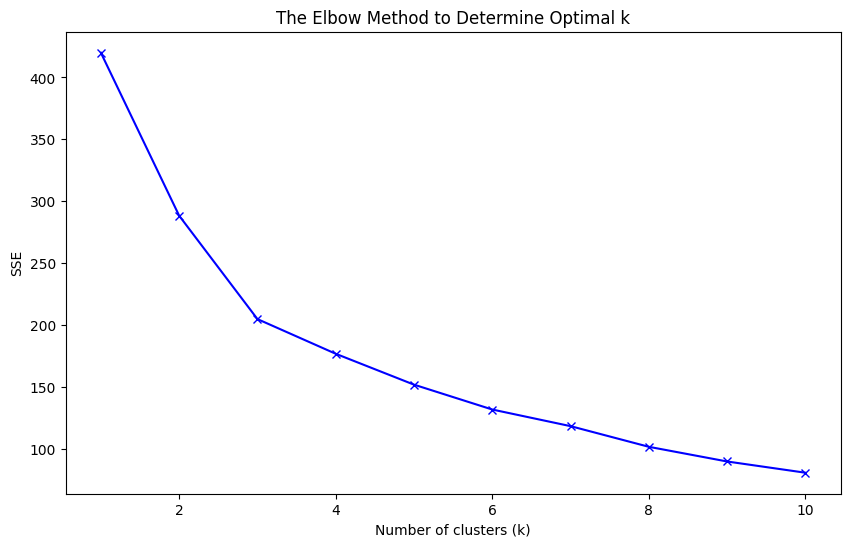

In [23]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) ## 42 is the Answer to the Ultimate Question of Life, the Universe, and Everything - Douglas Adams -
    
    kmeans.fit(selected_features_scaled)
    sse[k] = kmeans.inertia_  # Sum of squared distances to closest cluster center

# Plot the SSE values for each k to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method to Determine Optimal k')
plt.show()




---

### **SILHOUETTE ANALYSIS**

The **Silhouette Analysis** provides a way to assess the **distance** between the resulting `clusters`. A `silhouette_score `ranges from `-1 to 1`, where a **high value** indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If many points have a high value, the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters.

The silhouette scores for `k=range(from_2_to_10)` are displayed in the plot. The `score` is highest for `k=3`, suggesting that **three clusters provide the best separation between clusters for the selected features**.

Based on both the Elbow Method and the silhouette scores, k=3 could be considered a good choice for the number of clusters

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

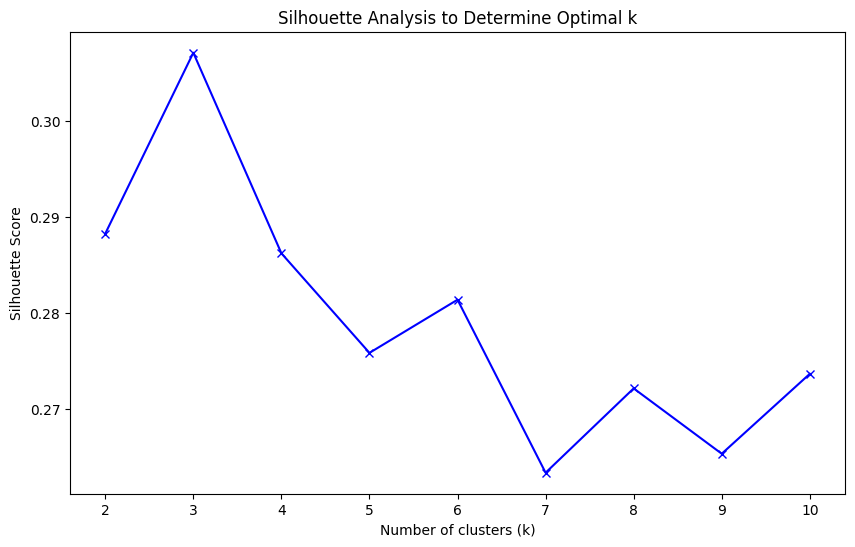

In [20]:
silhouette_scores = {}
for k in range(2, 11):  # Silhouette score is only valid for 2 or more clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features_scaled)
    silhouette_scores[k] = silhouette_score(selected_features_scaled, kmeans.labels_)

# Visualizing the silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis to Determine Optimal k')
plt.show()

---

<BR>
<BR>

### **RUNNING KMEANS**


The **K-means clustering algorithm** has been applied to the Twitter data with `k=3` clusters based on the selected features:

op (Openness), ex (Extraversion), and ne (Neuroticism). 

The clusters have been visualized in a pairplot, where each point represents a Twitter user and is colored based on the cluster it belongs to.

The mean values of the original features for each cluster are:


- **-Cluster 0:** [ -0.711, 0.975, -0.490] `->`  Characterized by lower Openness, highest Extraversion, and lower Neuroticism. This cluster also has the lowest average word count in tweets. 
- **Cluster 1:** [1.076, -0.633, -0.531] `-> `Characterized by highest Openness, lower Extraversion, and lower Neuroticism. This cluster has a higher average word count. 
- **Cluster 2:** [-0.321, -0.334, 0.948] `-> `Characterized by moderate Openness, moderate Extraversion, and highest Neuroticism. This cluster has the highest average word count.

/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


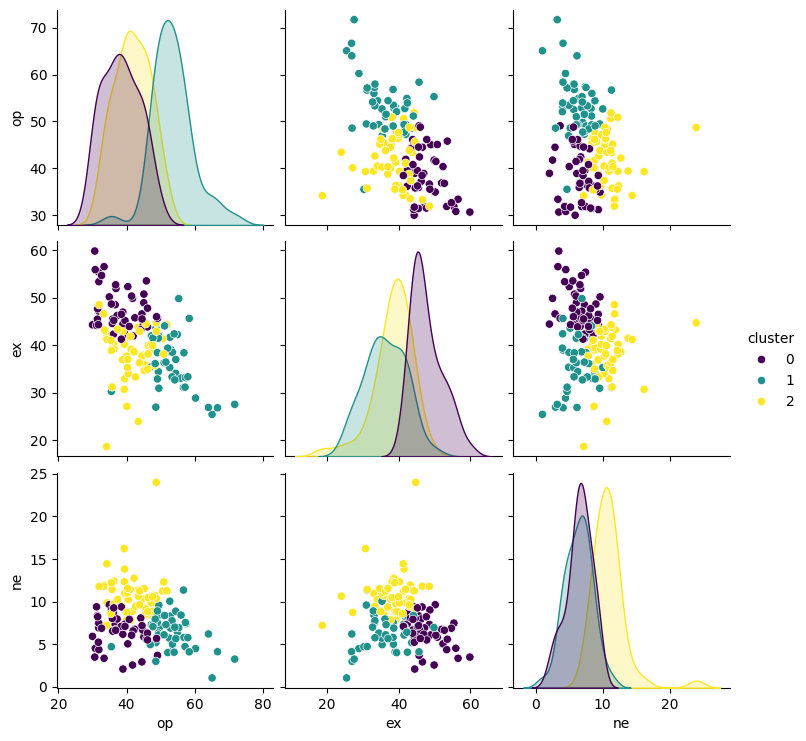

(array([[-0.71100283,  0.97465654, -0.48967949],
        [ 1.07604655, -0.6327528 , -0.53116564],
        [-0.32073397, -0.33388418,  0.94750429]]),
                 op         co         ex         ag         ne   wordcount  \
 cluster                                                                      
 0        38.445312  20.116088  47.742519  28.687881   6.517165   74.364465   
 1        53.448623  24.736069  36.234210  17.808748   6.391529  110.060584   
 2        41.721844  24.047669  38.373971  22.195056  10.869495  111.156653   
 
          categoria  cluster  
 cluster                      
 0         4.652174      0.0  
 1         2.177778      1.0  
 2         5.204082      2.0  )

In [28]:


kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(selected_features_scaled)

# Adding the cluster labels to the original dataframe for interpretation
twitter_users['cluster'] = cluster_labels

# Excluding non-numeric columns before calculating the mean
numeric_columns = twitter_users.select_dtypes(include=[np.number]).columns
clustered_data = twitter_users.groupby('cluster')[numeric_columns].mean()

# Visualizing the clusters
sns.pairplot(twitter_users, vars=['op', 'ex', 'ne'], hue='cluster', palette='viridis')
plt.show()

# Exploring the centroids of the clusters in the scaled feature space
centroids = kmeans.cluster_centers_

# Output the cluster centroids and the mean values of features in each cluster
centroids, clustered_data

### **CLUSTERS AND `CATEGORIAS` or Jobs of the TWitter users**

The distribution of occupational categories within each cluster is as follows:

- **Cluster 0**: This cluster has a somewhat balanced distribution across different occupational categories, with a slight emphasis on categories 4 (TV, series), 2 (Singer), and 7 (Sports).

- **Cluster 1:** This cluster is dominated by categories 2 (Singer) and 1 (Actor/Actress), suggesting that these professions may share similar personality traits based on the features selected.

- **Cluster 2**: This cluster has a more even distribution across categories 1 (Actor/Actress), 7 (Sports), 8 (Politics), and 9 (Writer), indicating a diverse set of occupations that may correlate with the personality traits in this cluster.

In [30]:
# Implementing the K-means Algorithm with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(selected_features_scaled)

# Adding the cluster labels to the original dataframe for interpretation
twitter_users['cluster'] = cluster_labels

# Excluding non-numeric columns before calculating the mean
numeric_columns = twitter_users.select_dtypes(include=[np.number]).columns
clustered_data = twitter_users.groupby('cluster')[numeric_columns].mean()

# Analyzing the distribution of occupational categories within each cluster
category_distribution = twitter_users.groupby('cluster')['categoria'].value_counts().unstack(fill_value=0)

# Exploring the centroids of the clusters in the scaled feature space
centroids = kmeans.cluster_centers_

# Output the cluster centroids, the mean values of features in each cluster, and the category distribution
(centroids, clustered_data, category_distribution)


/home/felipera/anaconda3/envs/fixing-geetiles/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([[-0.71100283,  0.97465654, -0.48967949],
        [ 1.07604655, -0.6327528 , -0.53116564],
        [-0.32073397, -0.33388418,  0.94750429]]),
                 op         co         ex         ag         ne   wordcount  \
 cluster                                                                      
 0        38.445312  20.116088  47.742519  28.687881   6.517165   74.364465   
 1        53.448623  24.736069  36.234210  17.808748   6.391529  110.060584   
 2        41.721844  24.047669  38.373971  22.195056  10.869495  111.156653   
 
          categoria  cluster  
 cluster                      
 0         4.652174      0.0  
 1         2.177778      1.0  
 2         5.204082      2.0  ,
 categoria   1   2  3   4  5  6  7   8  9
 cluster                                 
 0           4   9  1  12  2  4  7   5  2
 1          13  22  6   2  0  0  1   1  0
 2          10   3  2   5  2  4  9  10  4)